<a href="https://colab.research.google.com/github/sm1899/ML/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering on MNIST Data

## Overview
This Python script performs K-Means clustering on the MNIST dataset using cosine similarity. The script includes functions for initializing centroids, updating centroids, calculating cosine similarity, checking convergence, and plotting clusters. It explores different values of k and visualizes the resulting clusters.

## Structure
- **Cosine Similarity Matrix Function:** Calculates the cosine similarity between data points and centroids.
- **Initialize Centroids Function:** Randomly selects initial centroids.
- **Update Centroids Function:** Updates centroids based on assigned data points.
- **K-Means Iteration Function:** Performs one iteration of K-Means, updating assignments based on cosine similarity.
- **Convergence Check Function:** Checks if K-Means has converged based on centroid changes.
- **K-Means Function:** Main K-Means algorithm, iterating until convergence or reaching a maximum number of iterations.
- **WCSS Function:** Calculates the Within-Cluster Sum of Squares.
- **Plot Clusters Function:** Visualizes clusters for different values of k.
- **Main Function:** Reads MNIST data, performs K-Means for various k values, plots clusters, and visualizes the elbow plot.

## Functionality
1. **K-Means Clustering:** The script applies the K-Means algorithm to the MNIST dataset, exploring different values of k (4, 7, 10, 13).
2. **Cluster Visualization:** After clustering, the script visualizes sample images from each cluster.
3. **Elbow Plot:** An elbow plot is generated, showing the Within-Cluster Sum of Squares (WSS) for different values of k. This helps in determining the optimal number of clusters.

## Data
The MNIST dataset is loaded from "/content/sample_data/mnist_train_small.csv". Images are normalized to a range of [0, 1].

## Usage
Run the script, and it will perform K-Means clustering on the MNIST dataset, visualize clusters, and display an elbow plot for different values of k.


At k = 4


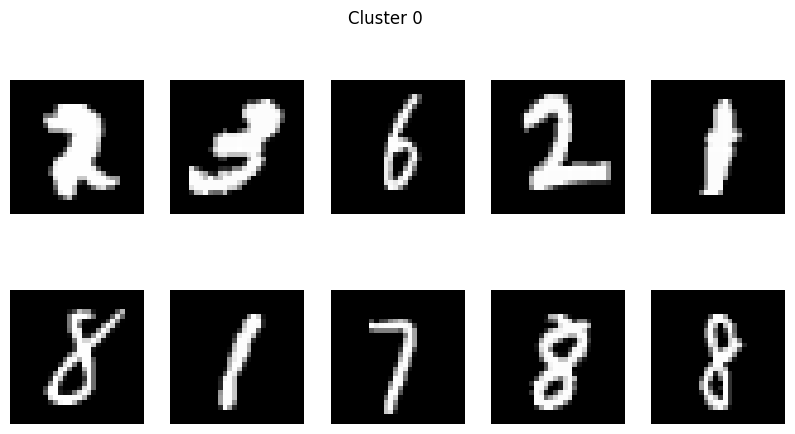

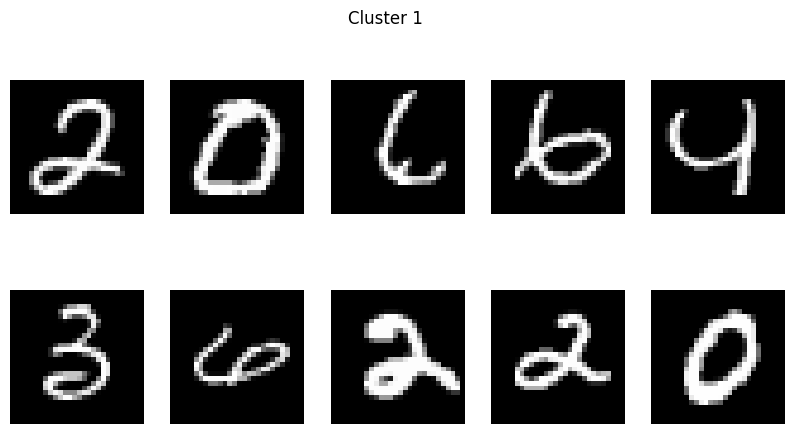

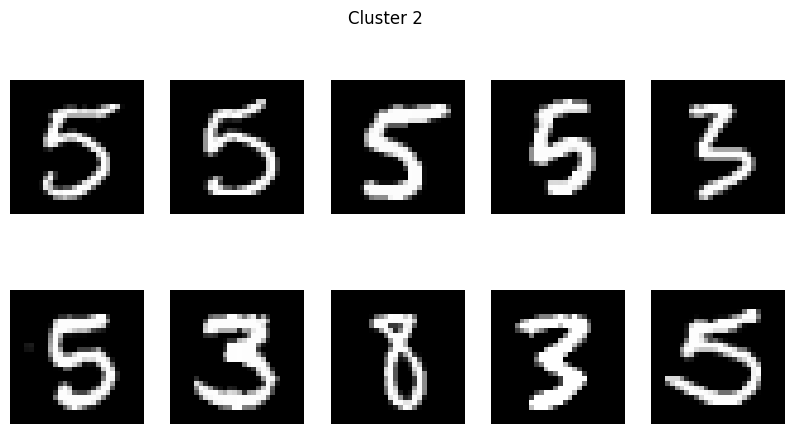

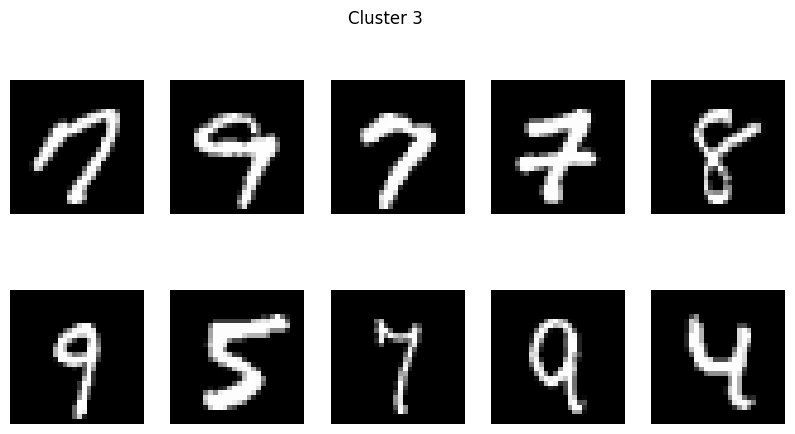

At k = 7


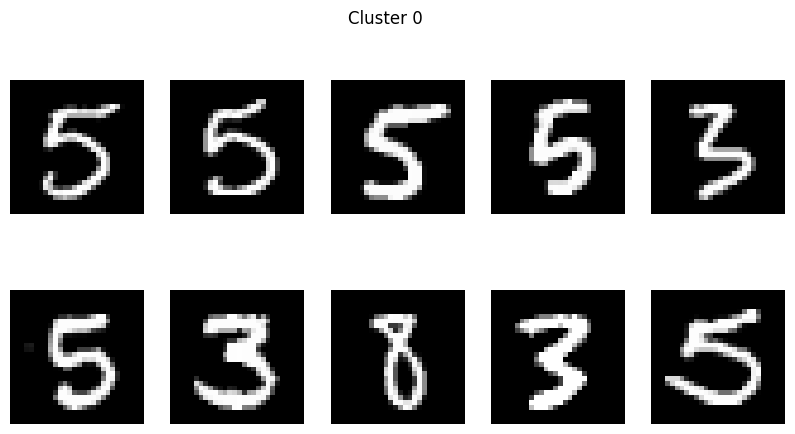

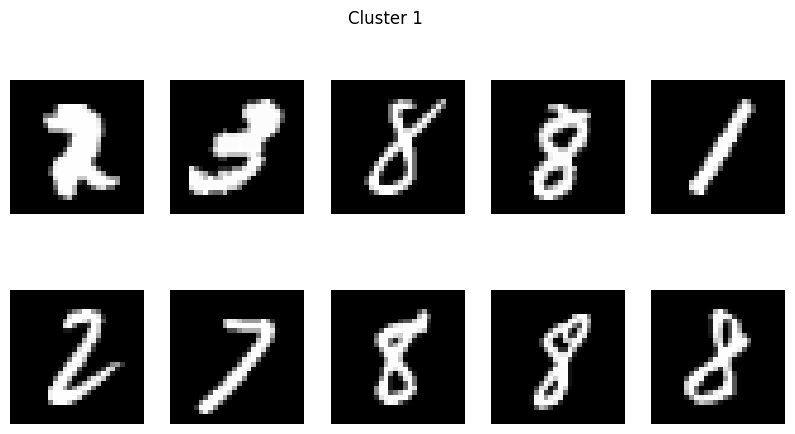

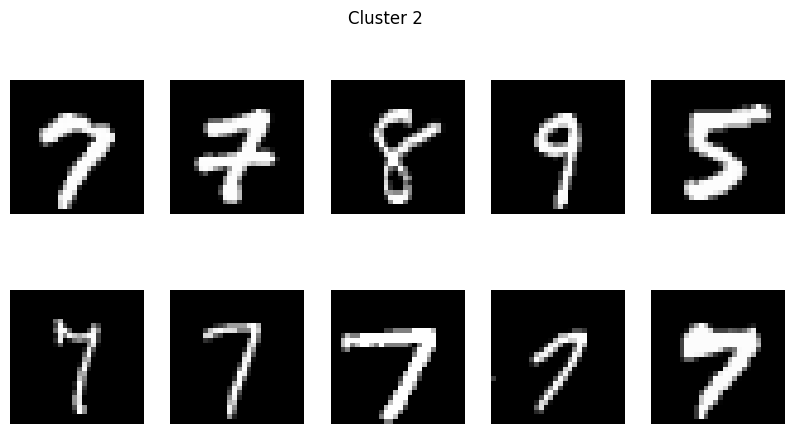

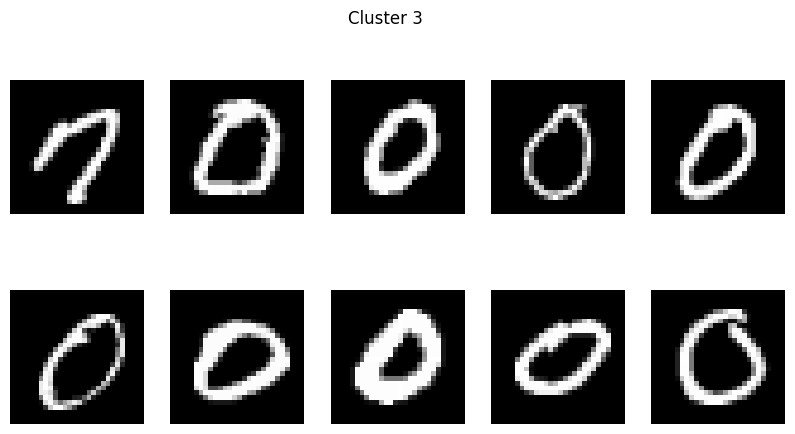

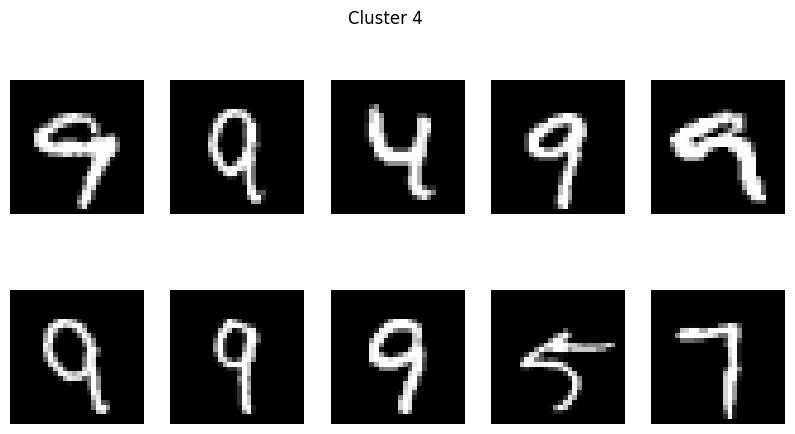

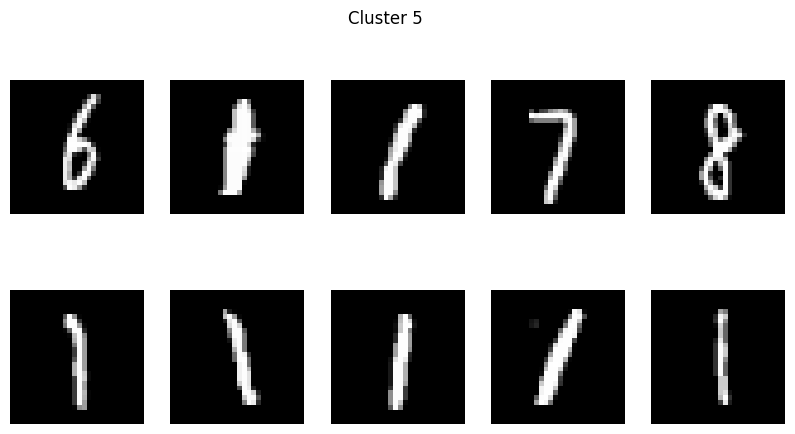

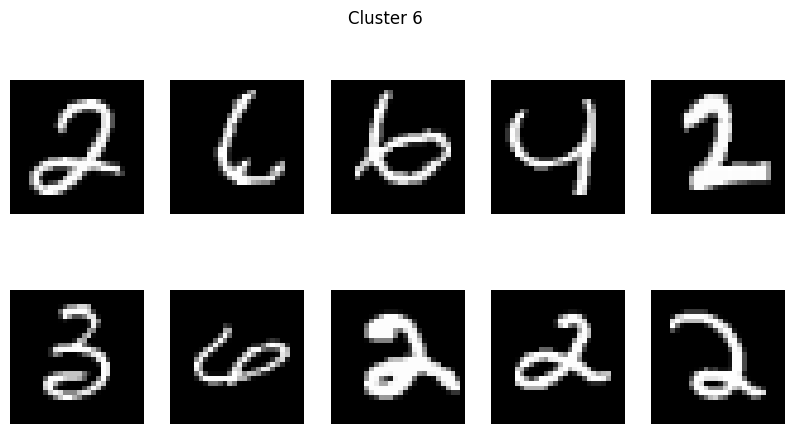

At k = 10


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to compute the cosine similarity matrix between two sets of vectors
def cosine_similarity_matrix(d, mu):
    norms_d = np.linalg.norm(d, axis=1)
    norms_mu = np.linalg.norm(mu, axis=1)
    return np.dot(d, mu.T) / (np.outer(norms_d, norms_mu) + 1e-12)

# Function to initialize centroids randomly
def initialize_centroids(d, k):
    return d[np.random.choice(d.shape[0], k, replace=False)]

# Function to update centroids based on assigned data points
def update_centroids(d, assignments, k):
    centroids = np.array([np.mean(d[assignments == j], axis=0) for j in range(k)])
    return centroids

# Function representing a single iteration of the k-means algorithm
def kmeans_iteration(d, mu):
    r = cosine_similarity_matrix(d, mu)
    assignments = np.argmax(r, axis=1)
    return assignments

# Function to check if k-means algorithm has converged
def kmeans_converged(mu, old_mu, tol=1e-6):
    return np.all(np.abs(mu - old_mu) < tol)

# Function to perform the k-means clustering algorithm
def kmeans(d, k, max_itr=500):
    mu = initialize_centroids(d, k)
    old_mu = np.copy(mu)
    wcss_values = []  # within-cluster sum of squares
    for t in range(max_itr):
        assignments = kmeans_iteration(d, mu)
        mu = update_centroids(d, assignments, k)
        wcss_values.append(wcss(d, mu, assignments))
        if kmeans_converged(mu, old_mu):
            return mu, assignments, wcss_values
        old_mu = np.copy(mu)
    return mu, assignments, wcss_values

# Function to calculate the within-cluster sum of squares
def wcss(d, mu, assignments):
    wcss = np.sum([np.sum(np.linalg.norm(d[assignments == i] - mu[i], axis=1) ** 2) for i in range(len(mu))])
    return wcss

# Function to plot clusters of images
def plot_clusters(images, assignments, k):
    grouped_images = {i: [] for i in range(k)}
    for i in range(len(assignments)):
        k = assignments[i]
        grouped_images[k].append(images[i])
    for k, image_list in grouped_images.items():
        plt.figure(figsize=(10, 5))
        for i, image in enumerate(image_list[:10]):
            plt.subplot(2, 5, i + 1)
            plt.imshow(image.reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.suptitle(f'Cluster {k}')
        plt.show()

# Main function
def main():
    mnist = pd.read_csv("/content/sample_data/mnist_train_small.csv")
    k_list = [4, 7, 10, 13]
    wcss_list = []
    images = mnist.drop(mnist.columns[0], axis=1).to_numpy() / 255.0
    for k in k_list:
        print(f"At k = {k}")
        final_centroids, assignments, wcss_values = kmeans(images, k)
        wcss_list.append(wcss_values[-1])
        plot_clusters(images, assignments, k)
    plt.plot(k_list, wcss_list, marker='o')
    plt.title('wss vs k')
    plt.xlabel('k')
    plt.ylabel('WSS')
    plt.show()

if __name__ == "__main__":
    main()




**Explanation:**

1. **Imports:** The code starts by importing necessary libraries - `numpy` for numerical operations, `pandas` for data manipulation, and `matplotlib.pyplot` for plotting.

2. **Cosine Similarity Matrix:** The `cosine_similarity_matrix` function calculates the cosine similarity between two sets of vectors.

3. **Centroid Initialization:** The `initialize_centroids` function randomly selects initial centroids from the data.

4. **Centroid Update:** The `update_centroids` function updates centroids based on the assigned data points.

5. **K-means Iteration:** The `kmeans_iteration` function performs one iteration of the k-means algorithm, assigning data points to clusters based on cosine similarity.

6. **Convergence Check:** The `kmeans_converged` function checks if the k-means algorithm has converged by comparing the difference between current and old centroids.

7. **K-means Algorithm:** The `kmeans` function runs the k-means algorithm for a specified number of iterations, updating centroids and assignments until convergence.

8. **Within-Cluster Sum of Squares (WCSS):** The `wcss` function calculates the WCSS, a measure of the compactness of clusters.

9. **Plotting Clusters:** The `plot_clusters` function visualizes clustered images.

10. **Main Function:** The `main` function loads the MNIST dataset, performs k-means clustering for different values of k, and plots the WCSS against k.

11. **Execution:** The script executes the `main` function if it is the main module, loading the dataset, running k-means, and displaying the results.